Modelos de Clasificación 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
import warnings

In [ ]:
warnings.filterwarnings("ignore")
style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
# Dataset de Microsoft Corporation (MSFT)
msft = yf.Ticker('MSFT')
df = msft.history(period="max", auto_adjust=True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056,0.064,0.056,0.061,1031788800,0.000,0.000
1986-03-14,0.061,0.064,0.061,0.063,308160000,0.000,0.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,0.000,0.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,0.000,0.000
1986-03-19,0.063,0.063,0.061,0.062,47894400,0.000,0.000
...,...,...,...,...,...,...,...
2022-08-05,279.150,283.650,278.680,282.910,16767900,0.000,0.000
2022-08-08,284.050,285.920,279.320,280.320,18739200,0.000,0.000
2022-08-09,279.640,283.080,277.610,282.300,23405200,0.000,0.000


In [ ]:
#eliminamos las variables sin valores
df = df.drop(['Dividends'], axis='columns')
df = df.drop(['Stock Splits'], axis='columns')
df

,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13,0.056,0.064,0.056,0.061,1031788800
1986-03-14,0.061,0.064,0.061,0.063,308160000
1986-03-17,0.063,0.065,0.063,0.064,133171200
1986-03-18,0.064,0.065,0.062,0.063,67766400
1986-03-19,0.063,0.063,0.061,0.062,47894400
...,...,...,...,...,...
2022-08-05,279.150,283.650,278.680,282.910,16767900
2022-08-08,284.050,285.920,279.320,280.320,18739200
2022-08-09,279.640,283.080,277.610,282.300,23405200


## Variables adicionales:

RSI (Indicador de fuerza relativa):

In [ ]:
delta = df['Close'].diff()
up = delta.clip(lower = 0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
df['RSI'] = 100 - (100/(1+rs))
df

,Open,High,Low,Close,Volume,RSI
Date,,,,,,
1986-03-13,0.056,0.064,0.056,0.061,1031788800,NaN
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678
...,...,...,...,...,...,...
2022-08-05,279.150,283.650,278.680,282.910,16767900,62.794
2022-08-08,284.050,285.920,279.320,280.320,18739200,60.065
2022-08-09,279.640,283.080,277.610,282.300,23405200,61.444


MACD:

In [ ]:
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 -exp2
df['Signal line'] = df['MACD'].ewm(span=9, adjust=False).mean()

df.head()

,Open,High,Low,Close,Volume,RSI,MACD,Signal line
Date,,,,,,,,
1986-03-13,0.056,0.064,0.056,0.061,1031788800,NaN,0.000,0.000
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000,0.000,0.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000,0.000,0.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353,0.000,0.000
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678,0.000,0.000


Eliminando valores perdidos (faltantes)

In [ ]:
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
RSI            1
MACD           0
Signal line    0
dtype: int64

In [ ]:
#Quitamos las filas que tengan el valor de NaN
df=df.dropna()
df

,Open,High,Low,Close,Volume,RSI,MACD,Signal line
Date,,,,,,,,
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000,0.000,0.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000,0.000,0.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353,0.000,0.000
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678,0.000,0.000
1986-03-20,0.062,0.062,0.059,0.060,58435200,85.311,0.000,0.000
...,...,...,...,...,...,...,...,...
2022-08-05,279.150,283.650,278.680,282.910,16767900,62.794,5.700,3.320
2022-08-08,284.050,285.920,279.320,280.320,18739200,60.065,5.764,3.809
2022-08-09,279.640,283.080,277.610,282.300,23405200,61.444,5.907,4.229


Seleccionamos las características para el modelo

In [ ]:
data = df[['Open', 'High', 'Low','Close', 'Volume','RSI', 'MACD']]
data.head()

,Open,High,Low,Close,Volume,RSI,MACD
Date,,,,,,,
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000,0.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000,0.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353,0.000
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678,0.000
1986-03-20,0.062,0.062,0.059,0.060,58435200,85.311,0.000


In [ ]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9178 entries, 1986-03-14 to 2022-08-11
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9178 non-null   float64
 1   High    9178 non-null   float64
 2   Low     9178 non-null   float64
 3   Close   9178 non-null   float64
 4   Volume  9178 non-null   int64  
 5   RSI     9178 non-null   float64
 6   MACD    9178 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 573.6 KB


Obtenemos las Estadísticas Descriptivas de las variables

In [ ]:
data.describe()

,Open,High,Low,Close,Volume,RSI,MACD
count,9178.000,9178.000,9178.000,9178.000,9178.000,9178.000,9178.000
mean,38.623,39.027,38.204,38.632,58341668.185,54.076,0.204
std,64.208,64.858,63.507,64.222,37005931.061,11.802,1.214
min,0.057,0.058,0.056,0.057,2304000.000,16.937,-9.430
25%,2.859,2.903,2.836,2.860,34288725.000,45.792,-0.044
50%,19.014,19.209,18.841,19.000,51757600.000,53.972,0.023
75%,29.910,30.303,29.464,29.891,72227200.000,62.404,0.305
max,343.110,348.138,340.700,341.606,788688000.000,100.000,10.433


Normalizamos los valores de las características

In [ ]:
data_norm = (data - data.min())/(data.max() - data.min())
data_norm

,Open,High,Low,Close,Volume,RSI,MACD
Date,,,,,,,
1986-03-14,0.000,0.000,0.000,0.000,0.389,1.000,0.475
1986-03-17,0.000,0.000,0.000,0.000,0.166,1.000,0.475
1986-03-18,0.000,0.000,0.000,0.000,0.083,0.932,0.475
1986-03-19,0.000,0.000,0.000,0.000,0.058,0.888,0.475
1986-03-20,0.000,0.000,0.000,0.000,0.071,0.823,0.475
...,...,...,...,...,...,...,...
2022-08-05,0.814,0.815,0.818,0.828,0.018,0.552,0.762
2022-08-08,0.828,0.821,0.820,0.821,0.021,0.519,0.765
2022-08-09,0.815,0.813,0.815,0.826,0.027,0.536,0.772


In [ ]:
data_norm.describe()

,Open,High,Low,Close,Volume,RSI,MACD
count,9178.000,9178.000,9178.000,9178.000,9178.000,9178.000,9178.000
mean,0.112,0.112,0.112,0.113,0.071,0.447,0.485
std,0.187,0.186,0.186,0.188,0.047,0.142,0.061
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.008,0.008,0.008,0.008,0.041,0.347,0.473
50%,0.055,0.055,0.055,0.055,0.063,0.446,0.476
75%,0.087,0.087,0.086,0.087,0.089,0.547,0.490
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## MODELOS DE CLUSTERING 

## Modelo K-means.

In [ ]:
from sklearn.cluster import KMeans

## Busquemos la cantidad optima de Clusters

Calculamos que tan similares son los datos dentro de los clusters

In [ ]:
# WCSS es la suma de los cuadrados de las distancias y se refiere a Within-Cluster-Sum-of-Squares, 
# Yi es el centroide del elemento o dato Xi y n el total de datos en la muestra.

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, max_iter = 1000)
  kmeans.fit(data_norm) #Aplicamos k-means a la base de datos
  wcss.append(kmeans.inertia_)

Graficamos los resultados de WCSS para formar el Codo Jambú

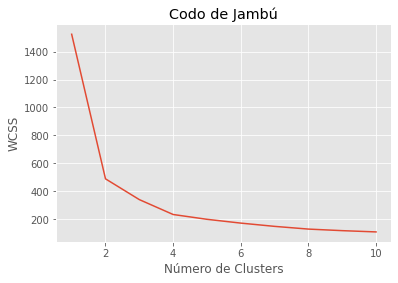

In [ ]:
plt.plot(range(1,11), wcss)
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # Indica que tan similares son los datos dentro de los Clusters
plt.title('Codo de Jambú')
plt.show()

Elegimos un punto donde el valor de WCSS deje de diminuir de manera drástica, que es valor 3

Aplicamos el modelo de k-means a la base de datos

In [ ]:
clustering = KMeans(n_clusters=3, max_iter = 1000) # crea el modelo

clustering.fit(data_norm) # Aplicamos el modelo a la base de datos

KMeans(max_iter=1000, n_clusters=3)

Agregamos la calificacion al datafreme para los modelos

In [ ]:
data['KMeans_Clusters'] = clustering.labels_ # los resultados del clustering se guardan en labes_ dentro del modelo
data.head()

,Open,High,Low,Close,Volume,RSI,MACD,KMeans_Clusters
Date,,,,,,,,
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000,0.000,0
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000,0.000,0
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353,0.000,0
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678,0.000,0
1986-03-20,0.062,0.062,0.059,0.060,58435200,85.311,0.000,0


### Visualizamos los Clusters que se formaron

Aplicamos el Análisis de Componentes Principales (PCA) para darnos una idea de como se forma los clusters

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit_transform(data_norm)

pca_df = pd.DataFrame(data=pca, columns=['Componente_1', 'Componente_2'])


data_cluster =  pd.DataFrame(data =  clustering.labels_,columns=['Grupo'])

pca_cont = pd.concat([pca_df, data_cluster], axis=1)

pca_cont

,Componente_1,Componente_2,Grupo
0,-0.222,0.537,0
1,-0.213,0.545,0
2,-0.211,0.482,0
3,-0.212,0.439,0
4,-0.214,0.376,0
...,...,...,...
9173,1.428,0.102,1
9174,1.435,0.070,1
9175,1.425,0.088,1
9176,1.474,0.144,1


Usamos Matplotlib, que es una librería de Python especializada en la creación de gráficos en dos dimensiones

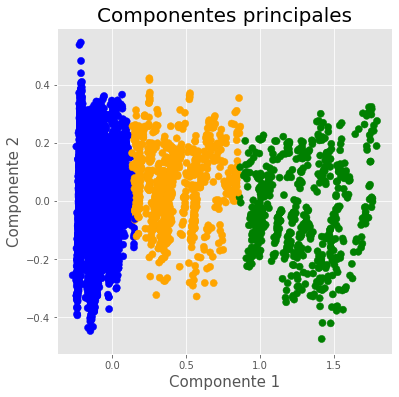

In [ ]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme = np.array(['blue', 'green', 'orange'])
ax.scatter(x = pca_cont.Componente_1, y= pca_cont.Componente_2, c=color_theme[pca_cont.Grupo], s=50)

plt.show()